<h1 style="text-align: center;">An Investigation of the Relationship between Covid Cases / Deaths and the Discussion Trend on Reddit</h1>
<h4 style="text-align: center; margin-top: 15px;">Presented by Haoyu Zhuang (hz542), Kaiyue Fang (kf279)</h4> 

## Introduction

In contrast to the 1918 flu pandemic, COVID-19 can be considered as a “modern” disease, with its high transmission rate and relatively low fatality rate. Not only is COVID-19 "modern" in terms of epidemiology, we find it also "modern" from a sociological perspective. Nowadays, the popularity of social platforms accelerates the spreading of information, enabling real-time interaction online despite of physical distances. 

Consequently, we find it particularly compelling to interpret the pandemic from a sociological standpoint. In particular, we want to analyze people’s reactions to the disease on Reddit via pushshift.io API, which allows us to perform extensive keyword searching within Reddit comments and thus analyze keyword frequencies. Our research questions can be generalized as follows:
1. Is there a relationship between frequencies of different but relevant keywords? If so, how strong it is?
2. How does the discussion trend for each keyword change over the spreading of covid-19? 

Mostly speaking, we arrive at conclusions for our research questions. When keywords are closely related in real world, we find their frequencies demonstrate similar patterns. We might also be able to predict the frequency of one keyword using the frequency of another keyword. Also, the discussion trend about covid-19 on Reddit has a linear relationship with the trend in daily positive/death cases. In the following report, we will first introduce our dataset, analysis we performed on it, and finally our interpretation and reflection on the project. 

## Data Description

Below is an overview of our analysis-ready dataset.

In [53]:
data

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_cash_count,covid_money_count,covid_blm_count,covid_biden_count,...,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count,total_test_increase,death_increase,positive_increase,death_increase_ratio
0,2020-03-03,6455,5381,20437,95,101,21,92,1,20,...,178,20,37,3,43,5,266,3,48,0.062500
1,2020-03-04,6672,5561,20886,96,123,21,113,0,53,...,174,13,40,3,28,5,1119,2,139,0.014388
2,2020-03-05,7434,6181,21201,116,108,24,113,0,35,...,165,14,38,5,32,6,641,4,107,0.037383
3,2020-03-06,8186,6732,22031,117,148,42,158,0,31,...,221,24,57,2,48,6,873,6,112,0.053571
4,2020-03-07,8077,6530,20570,116,115,15,120,0,27,...,198,13,51,7,46,8,919,1,178,0.005618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2020-09-28,24603,4497,4040,491,1535,153,1041,86,364,...,111,28,28,81,43,77,1010138,257,36524,0.007036
210,2020-09-29,28549,5069,4296,573,1671,173,1093,131,438,...,126,46,28,104,45,87,812773,739,36947,0.020002
211,2020-09-30,28285,4905,4092,905,1700,158,1019,128,1508,...,227,81,67,253,83,241,790981,1061,44424,0.023883
212,2020-10-01,27641,4802,4180,543,1748,177,1095,116,482,...,251,94,62,288,83,257,899458,847,45694,0.018536


The analysis-ready dataset was created by ourselves for our final project in this course. It was created for the purpose of observing how people's comments about covid-related topics on Reddit are related to the trend of daily covid-19 positive and death cases in the US.  
<br>
Within the dataset, the observations are 214 days in chronological order, starting from 03/03/2020 to 10/02/2020, and the attributes are the daily frequencies of (combinations of) keywords on Reddit as well as the daily covid-19 positive and death cases. Each instance is labelled with its date in the `date` column. For keywords frequencies on Reddit comments, we use the format keyword1_(keyword2_)count to name these columns.  
<br>
The data comes from two sources: the pushshift.io API and the Covid Tracking Project. The pushshift.io API is maintained by the /r/datasets mod team to help users better find comments and submissions on Reddit, and the Covid Tracking Project is maintained by a group of volunteers. We used pushshift.io API to capture the frequencies of different comments on Reddit, and for our analysis, we utilized the /comment endpoint which allows us to search for multiple keywords in Reddit comments and returns the data in JSON format. We downloaded the csv file from the Covid Tracking Project website.  
<br>
We wrote a Python script loading and processing the JSON data, then converting the data into CSV files. The script is available in the Source Code section. We then used the Jupyter notebook to conduct the data cleaning process, and the details are in the Date Cleaning Description appendix. The raw data files can be found in https://github.com/kaiyue95/INFO-2950-Final-Project. For details about our preprocessing, we illustrate our data cleaning process in the appendices.  
<br>
The dataset does not contain all possible instances. The set of all possible instances should include all dates during the spreading of covid-19. It is unclear when the first post talking about covid-19 appeared on Reddit. Also, we are unsure about when was the first case of covid-19 identified. Considering this vague timeline, we decided to take a sample from the larger set. We believe that our sample dataset is representative to a large extent, as we include most of the dates during this epidemic, and we will only report our analysis based on this period of time. For covid-19 cases, the Covid Tracking Project should be accurate, so we observed and recorded all required data. For Reddit comments, we selected keywords that we thought would yield interesting results. We might miss counting certain keywords if they were not typed correctly.  
<br>
This dataset relates to people as it includes people's comments and the covid-19 cases. All information contained in this dataset is public and can be found online. Also, as the dataset only contains aggregated information, it is impossible to identify individuals. Reddit users should be aware of the fact that their comments are public information, but they might not be notified about the particular pushshift.io API we used to collect data. For test-takers, their personal information is confidential, and they should have realized that their test results are kept for tracking the spread of the pandemic and doing other pandemic-related researches, but they did not know this analysis specifically. 

## Data Analysis

### Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

Here's what our cleaned data looks like. 

In [2]:
covid_df = pd.read_csv('datasheet.csv')
covid_df.date = pd.to_datetime(covid_df.date)
covid_df.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_cash_count,covid_money_count,covid_blm_count,covid_biden_count,...,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count,total_test_increase,death_increase,positive_increase
0,2020-03-03,6455,5381,20437,95,101,21,92,1,20,...,20,178,20,37,3,43,5,266,3,48
1,2020-03-04,6672,5561,20886,96,123,21,113,0,53,...,21,174,13,40,3,28,5,1119,2,139
2,2020-03-05,7434,6181,21201,116,108,24,113,0,35,...,15,165,14,38,5,32,6,641,4,107
3,2020-03-06,8186,6732,22031,117,148,42,158,0,31,...,24,221,24,57,2,48,6,873,6,112
4,2020-03-07,8077,6530,20570,116,115,15,120,0,27,...,12,198,13,51,7,46,8,919,1,178


A copy of our original data file, dropping the columns that are related to the number of daily cases or deaths. 

In [3]:
reddit = covid_df.drop(columns=['total_test_increase', 'death_increase', 'positive_increase'])
covid_df.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_cash_count,covid_money_count,covid_blm_count,covid_biden_count,...,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count,total_test_increase,death_increase,positive_increase
0,2020-03-03,6455,5381,20437,95,101,21,92,1,20,...,20,178,20,37,3,43,5,266,3,48
1,2020-03-04,6672,5561,20886,96,123,21,113,0,53,...,21,174,13,40,3,28,5,1119,2,139
2,2020-03-05,7434,6181,21201,116,108,24,113,0,35,...,15,165,14,38,5,32,6,641,4,107
3,2020-03-06,8186,6732,22031,117,148,42,158,0,31,...,24,221,24,57,2,48,6,873,6,112
4,2020-03-07,8077,6530,20570,116,115,15,120,0,27,...,12,198,13,51,7,46,8,919,1,178


We are interested in the topics that are on average most frequently discussed in the past 300 days (prior to 10/02/2020). It seems that people were talking a lot about covid tests, mask mandates, and job-related issues.   

<ipython-input-4-e3c8f24078bd>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_reddit = reddit.iloc[:, :16].mean().sort_values(ascending=False)


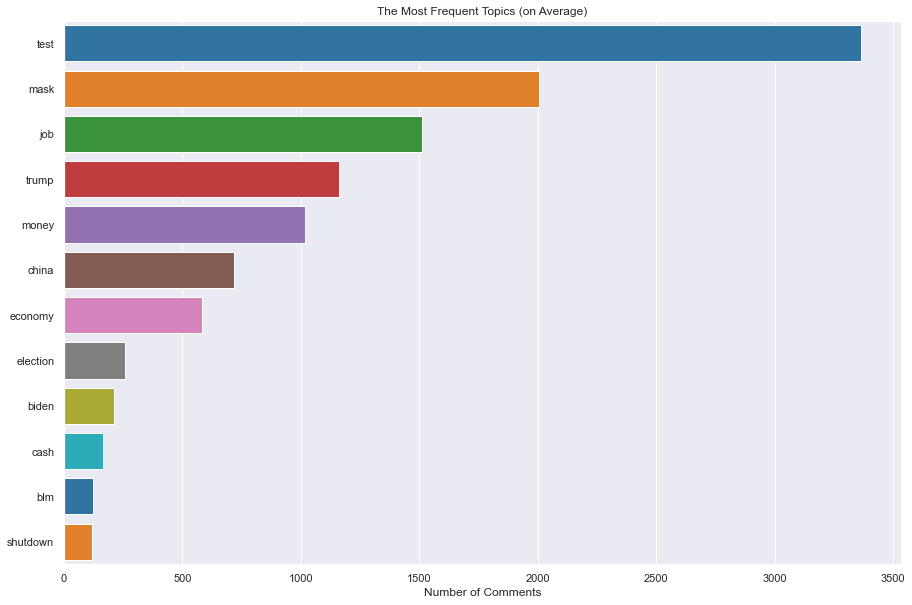

In [4]:
mean_reddit = reddit.iloc[:, :16].mean().sort_values(ascending=False)
mean_reddit.drop(labels=["covid_count", "covid-19_count", "coronavirus_count"], inplace=True)
_, ax1 = plt.subplots(figsize=(15, 10))
mean_barplot = sns.barplot(y=mean_reddit.index, x=mean_reddit, orient='h', ax=ax1, palette="tab10")
labels = mean_barplot.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], mean_reddit.index.tolist()))
x_label = mean_barplot.set_xlabel("Number of Comments")
title = mean_barplot.set_title("The Most Frequent Topics (on Average)")

It is also interesting to see whether the topics that are discussed the most on average are the topics most discussed on a single day. 

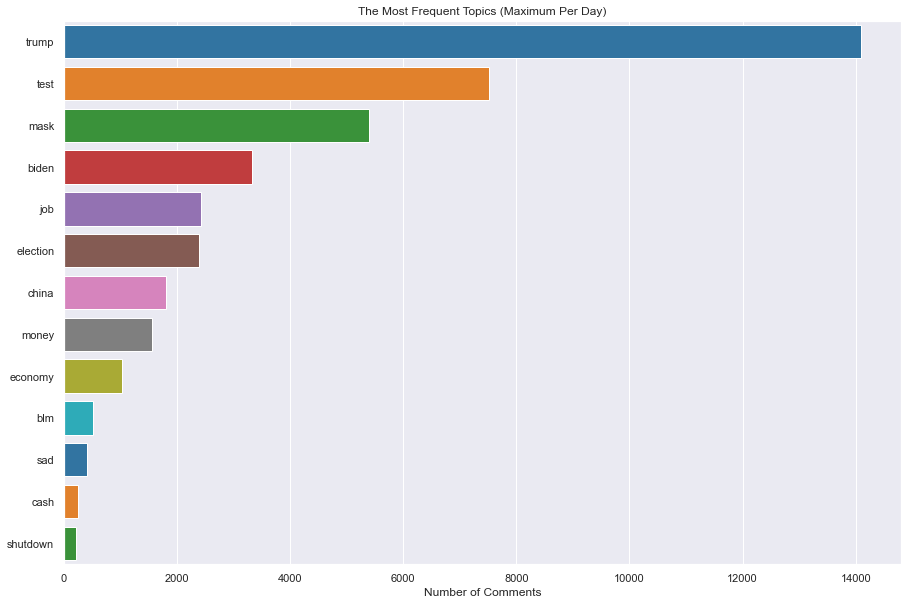

In [5]:
max_reddit = reddit.set_index('date').iloc[:, :16].max().sort_values(ascending=False)
max_reddit.drop(labels=["covid_count", "covid-19_count", "coronavirus_count"], inplace=True)
_, ax2 = plt.subplots(figsize=(15, 10))
max_barplot = sns.barplot(y=max_reddit.index, x=max_reddit, orient='h', ax=ax2, palette="tab10")
labels = max_barplot.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], max_reddit.index.tolist()))
x_label = max_barplot.set_xlabel("Number of Comments")
title = max_barplot.set_title("The Most Frequent Topics (Maximum Per Day)")

Based on the chart created below, it seems that **trump** is in a huge lead as compared to the rest of the keywords. This is probably a result of Trump's testing positive for covid-19 early October. 

Similarly, the ranks for *election* and *biden* have also increased. That is probably also related to Trump's diagnosis for Covid-19, and we're going to create a bunch of line charts to see whether that is true.

<AxesSubplot:xlabel='date'>

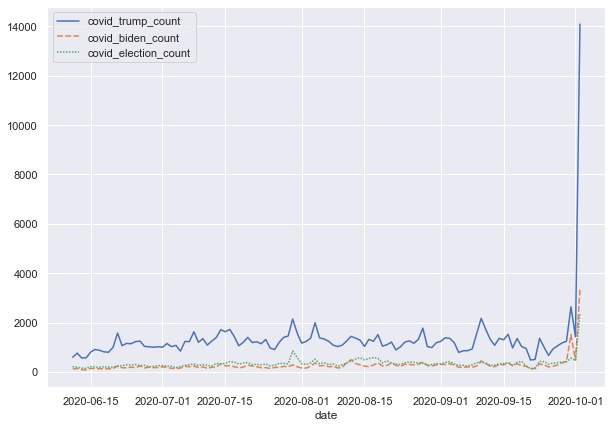

In [6]:
_, ax3 = plt.subplots(figsize=(10, 7))

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

new_result = covid_df.set_index("date").iloc[100:]
sns.lineplot(data=new_result[["covid_trump_count", "covid_biden_count", "covid_election_count"]], ax=ax3)

It is clear in the line chart that the number of comments related to Trump, Biden, and election has all skyrocketed the early October. It seems that people on reddit are really excited about Trump's testing positive for Covid and its potential impacts on the election results (which is probably what stole the election from Trump). However, it's a tragedy that we are not able to obtain the latest data from Reddit API as they turned off the aggregate function at the start of November, as the surge in cases in November and dramatic election results would very likely produce some interesting results worthy of in-depth analysis.

---

In addition, we are interested in the relationship between reddit comments and covid cases in US.

In [7]:
covid_positive_corr = covid_df.covid_count.corr(covid_df.positive_increase)
print('Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(covid_positive_corr))
covid_positive_rank_corr = covid_df.covid_count.corr(covid_df.positive_increase, method='spearman')
print('Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(covid_positive_rank_corr))

Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.46
Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.40


It seems that there is no strong correlation between covid comments on reddit and daily positive cases in US. However, there are a group of outliers roughly at line y = 0, and an outlier with a very large covid_count (the day when Trump tested positive for covid). The group of outliers probably represent the scenario in March, where people were starting to have discussions on covid but the number of cases per day were still pretty low.

<AxesSubplot:xlabel='covid_count', ylabel='positive_increase'>

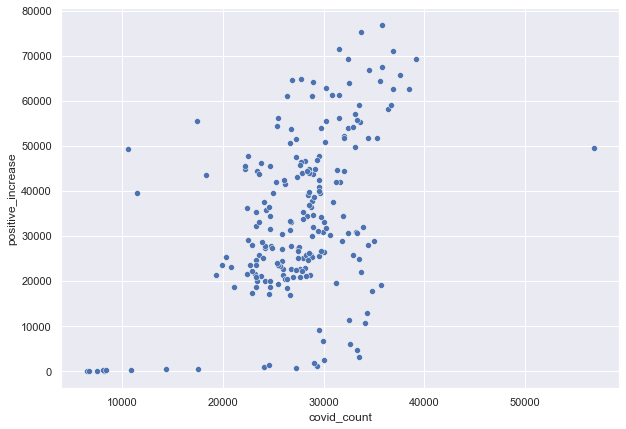

In [8]:
_, ax4 = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=covid_df['covid_count'], y=covid_df['positive_increase'], ax=ax4)

So what if we drop the first 30 rows of the dataframe when the covid cases have not yet surged but people have started talking about covid? How will this change the $r^2$ score for this correlation pattern?

In [9]:
new_covid_df = covid_df.iloc[30:]
new_covid_positive_corr = new_covid_df.covid_count.corr(new_covid_df.positive_increase)
print('Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(new_covid_positive_corr))
new_covid_positive_rank_corr = new_covid_df.covid_count.corr(new_covid_df.positive_increase, method='spearman')
print('Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(new_covid_positive_rank_corr))

Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.47
Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.52


<AxesSubplot:xlabel='covid_count', ylabel='positive_increase'>

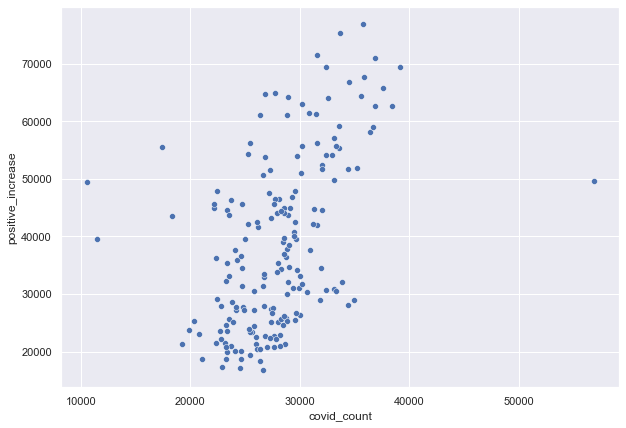

In [10]:
_, ax5 = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=new_covid_df['covid_count'], y=new_covid_df['positive_increase'], ax=ax5)

And remove the far-right outlier. 

In [11]:
max_index = new_covid_df['covid_count'].idxmax()
new_covid_df = new_covid_df.drop(index=max_index)

In [12]:
new_covid_positive_corr = new_covid_df.covid_count.corr(new_covid_df.positive_increase)
print('Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(new_covid_positive_corr))
new_covid_positive_rank_corr = new_covid_df.covid_count.corr(new_covid_df.positive_increase, method='spearman')
print('Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(new_covid_positive_rank_corr))

Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.50
Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.52


<AxesSubplot:xlabel='covid_count', ylabel='positive_increase'>

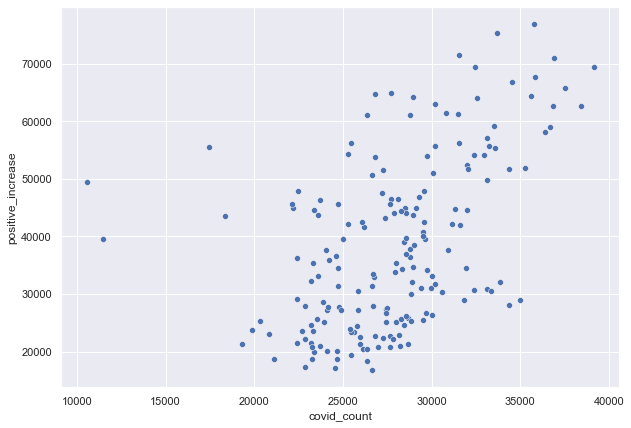

In [13]:
_, ax6 = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=new_covid_df['covid_count'], y=new_covid_df['positive_increase'], ax=ax6)

In the first case, we removed the March outliers with low `positive_increase` and high `covid_count`. This increases correlation coefficient from 0.46 to 0.47 (+0.01), while the rank correlation has increased by 0.12 (from 0.40 to 0.52). In the second case, we removed the outlier in the far right (with very high "covid_count"). As a result, the correlation coefficient increases by 0.03 (from 0.47 to 0.50), and the rank correlation remains the same.  

To conclude, the single far-right outlier has a larger influence on the correlation coefficient than the group of outliers at y = 0, whereas the group of outliers at y = 0 have greater impacts on the rank correlation. This is probably because the group of outliers at y = 0 is relatively close to the regression line and has minimal impact on the correlation coefficient. In other words, correlation coefficient is very sensitive to outliers far away from the regression line, while not so sensitive to the *disorder* we observe in the scatterplot at y = 0. In contrast, the rank correlation is very sensitive to any "disorder" of the data points. Therefore, it's crucial that we use both correlation coefficient in our analysis so as to identify these two types of outliers and produce a more accurate result. 

------

Next, we are going to investigate the discussion trend of each keyword set as compared to the frequency of covid keyword each day. For example, we will divide the frequency of "covid+mask" over "covid" to produce a **relative frequency** that may allow us to observe its discussion trend over time. 

First, we are going to observe the trend for the word "test". 

In [14]:
covid_df = covid_df.set_index("date")

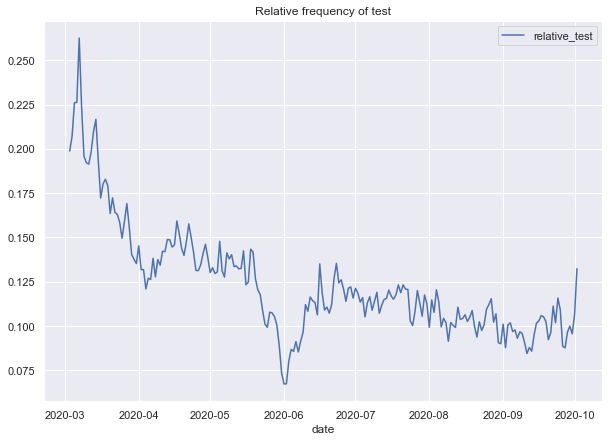

In [15]:
covid_df['relative_test'] = covid_df['covid_test_count'] / covid_df['covid_count']

_, ax7 = plt.subplots(figsize=(10, 7))
test_lineplot = sns.lineplot(data=covid_df[["relative_test"]], ax=ax7)
test_title = test_lineplot.set_title('Relative frequency of test')

The word "test" shows an overall decreasing trend over the course of pandemic. We suspect that people tend to discuss more about covid test at the start of the pandemic because the Covid testing was insufficient at that time. As there are more tests available throughout the United States, people start talking about other issues related to the pandemic. 

----

Then the keyword "mask". 

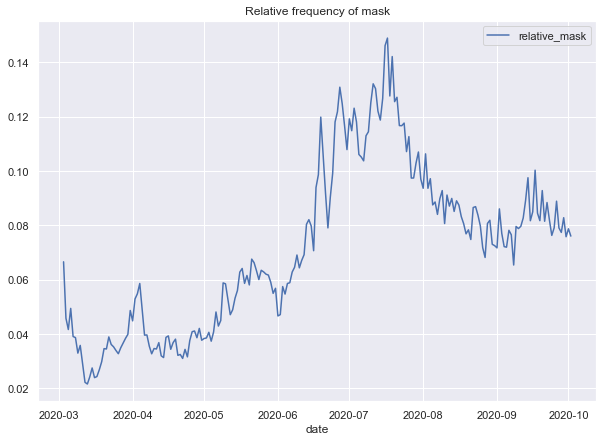

In [16]:
covid_df['relative_mask'] = covid_df['covid_mask_count'] / covid_df['covid_count']

_, ax8 = plt.subplots(figsize=(10, 7))
mask_lineplot = sns.lineplot(data=covid_df[["relative_mask"]], ax=ax8)
mask_title = mask_lineplot.set_title('Relative frequency of mask')

The keyword "mask" has its peak frequency right around July at the second peak of the pandemic. This is when people are becoming aware of the importance of wearing a mask and when a lot of states only issued mask recommendation instead of mask mandates. As the second surge of cases passed, the relative frequency of "mask" has also declined. 

----

Before exploring the trend of the keyword "job", we want to formulate a little hypothesis here. In April, around 22 million people in the U.S. have lost their job, while the job market is slowly recovering over the course of next several months. Therefore, we suspect that the discussion trend would be similar: the frequency will first rise dramatically, then gradually fall and steady out.

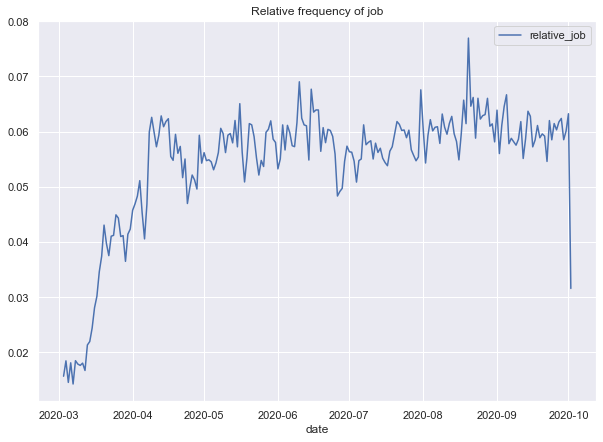

In [17]:
covid_df['relative_job'] = covid_df['covid_job_count'] / covid_df['covid_count']

_, ax9 = plt.subplots(figsize=(10, 7))
job_lineplot = sns.lineplot(data=covid_df[["relative_job"]], ax=ax9)
job_title = job_lineplot.set_title('Relative frequency of job')

From this chart, it is pretty clear that our hypothesis is wrong. Even though the frequency for "job" did rise quickly in April, it remained constant throughout the next few months. While we cannot quite figure out why that is the case, here's a couple of possible explanations:
1. The job market has not fully recovered, and therefore the job-related discussions are still going on;
2. The Reddit subgroup was impacted less severely as compared to the whole American population. The middle-lower-class Republican-leaning workers were hit the most heavily by the unemployment surge, and they were quite unlikely to be Reddit users. Therefore, the discussion trend of "job" has little correlation with the numbers of jobs that are back.  

----

## Preregistration Analysis

## Analysis 1

### Hypothesis

The linear model based on keywords related to politics, e.g., "Biden+covid" and "election+covid", can best predict the frequency of "Trump+covid".

### Analysis

Our first analysis will be grounded on a series of linear regression models that take in the number of times a set of keywords appear on Reddit and predict the frequency of the keyword "Trump+covid".  Our first model would look at how well "Biden+covid" and "election+covid" would be able to predict the frequency of "Trump+covid". Then, we are going to include a set of keywords unrelated to politics in our linear regression model and see whether the composition of any of the keywords can increase the prediction accuracy. The set of seemingly unrelated keywords includes but is not limited to "mask+covid", "job+covid" and "economy+covid". In the end, we will also be creating a single variable linear regression for each of the keywords to predict the frequency of "Trump+covid" and compare the results with the multivariable regression models. The final goal of this analysis is to find the best model (single variable / multivariable) that predicts the frequency of "Trump+covid", even though the model may only imply a correlational relationship but not a causational one. 

## Analysis 2

### Hypothesis

In our second analysis, our initial purpose was to explore how the frequency of "covid+death" in Reddit comments was influenced by the overall trend in death cases of covid-19. We expected there would exist a linear relationship between them. As we designed our models, we realized the concept of “proportion" might matter in our analysis. For example, people should be more sensitive to ten death cases out of twenty positive cases than ten death cases out of a thousand positive cases. Also, the proportion of comments discussing death in all comments mentioning "covid" should be more representative than the number of total comments mentioning "covid+death", so in the end we came up with two sub-hypotheses.

1. Considering how the overall discussion about covid-19 on reddit may influence the general frequency of a keyword, we hypothesize that the "relative" frequency of a keyword, which is calculated by the frequency of the keyword (e.g. "death+covid") divided by frequency of "covid", is a better indicator of its discussion trend. 
2. Based on our knowledge about the real-world application, we think people are more "sensitive" to the ratio of daily death increases over daily positive increases. Hence, we hypothesize that the latter one is a better predictor of frequency of the keyword "death" on reddit. 

### Analysis

Our analysis tool is a series of linear regression models. We decided to build the following four models: 

1. We will use daily death increases as the predictor, and our outcome will be the daily frequency of the keyword.
2. We will use daily death increases as the predictor, and our outcome will be the "relative" frequency of the keyword: ( covid_death_count / covid_count ).
3. We will use the ratio of daily death increases over daily positive increases as the predictor, and our outcome will be the daily frequency of the keyword.
4. We will use the ratio of daily death increases over daily positive increases as the predictor, and our outcome will be the "relative" frequency of the keyword: ( covid_death_count / covid_count ).

Overall, model 1 and 2 use one predictor, and model 3 and 4 use another predictor. Model 1 and 3 use one outcome, and model 2 and 4 use another outcome. In running these four models, we expect conclusions about two questions. 

1. Comparing Model 1 and 3, Model 2 and 4, is covid_death_count or ( covid_death_count / covid_count ), the "relative" keyword frequency considering how the overall discussion about covid-19 may influence the keyword count, a better indicator of a keyword trend on reddit?
2. Comparing Model 1 and 2, Model 3 and 4, is frequency of the keyword "death" better predicted by the increase in death cases or the ratio of daily death cases over daily positive cases?

## Hypothesis Testing, and Evaluation of Significance

### _Preregistration Analysis I_

The first model uses keywords "biden" and "election" to predict the frequency of "trump".

In [18]:
from sklearn.linear_model import LinearRegression

reg_trump = LinearRegression().fit(covid_df[['covid_biden_count', 'covid_election_count']], covid_df['covid_trump_count'])

trump_score = reg_trump.score(covid_df[['covid_biden_count', 'covid_election_count']], covid_df['covid_trump_count'])

print('The score of the model that uses biden and election to predict trump: {:.2f}'.format(trump_score))

The score of the model that uses biden and election to predict trump: 0.87


And we are going to plot the predicted values.

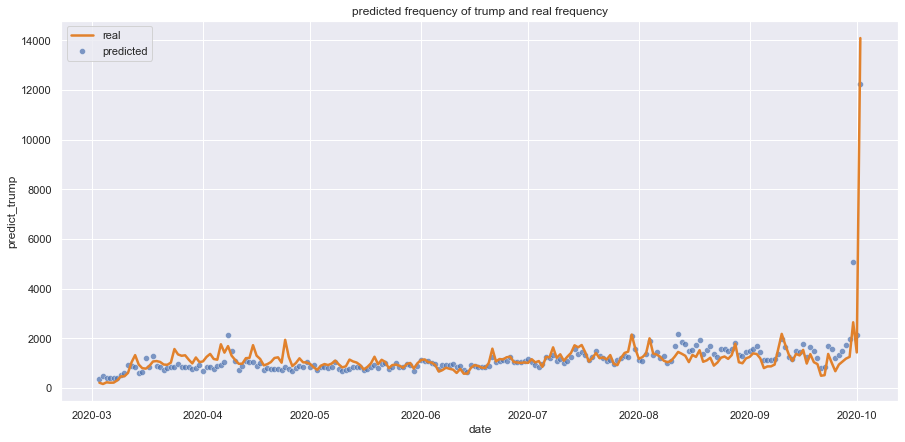

In [19]:
predict_trump = reg_trump.predict(covid_df[['covid_biden_count', 'covid_election_count']])
covid_df['predict_trump'] = predict_trump

_, ax10 = plt.subplots(figsize=(15, 7))
trump_scatter = sns.scatterplot(x=covid_df.index, y=covid_df['predict_trump'], ax=ax10, alpha=0.7, label='predicted')
trump_line = sns.lineplot(data=covid_df['covid_trump_count'], color='#e1812c', ax=ax10, linewidth=2.5, label='real')
trump_title = trump_line.set_title('predicted frequency of trump and real frequency')
ax10.legend()

The model based on the keywords "biden" and "election" does a good job capturing the overall trend of the keyword "trump". It is worthy to notice that the prediction accuracy is particularly good from May to July. **There are a few possible explanations**:

1. The up-and-down of the discussion trend is relatively small in this period, with minimal variatons (no peak / trough). This makes it easier for the model to capture the trend as compared to March or September when there is more variation.
2. When people talked about Trump in May to July, they were more likely to bring Biden and the election into the discussion, so that the model performed nicely to capturing the trend in this period as compared to March or September. 

We also note that the predicted value is lower than the actual value from March to late April, but higher than the actual value from early August to October. This pattern reveals that people were talking more about Trump during the early stage of the outbreak (from March to May), but shifted focus towards Biden and election as the election day came near (from August to October). 

---

Now that we have used these two variables ("biden" and "election") as the predictor and "trump" as the outcome, how is things going to change if we change the model to a single-variable one? In other words, what will the result be if we only use either "biden" or "election" to predict "trump"? Our hypothesis is that our initial multivariable model can better predict the result and have a higher $r^2$ score. 

The model that uses "election" to predict "Trump". 

In [20]:
reg_election = LinearRegression().fit(covid_df[['covid_election_count']], covid_df['covid_trump_count'])

election_score = reg_election.score(covid_df[['covid_election_count']], covid_df['covid_trump_count'])

print('The score of the model that uses election to predict trump: {:.2f}'.format(election_score))

The score of the model that uses election to predict trump: 0.74


The model that uses "Biden" to predict "Trump".

In [21]:
reg_biden = LinearRegression().fit(covid_df[['covid_biden_count']], covid_df['covid_trump_count'])

biden_score = reg_biden.score(covid_df[['covid_biden_count']], covid_df['covid_trump_count'])

print('The score of the model that uses biden to predict trump: {:.2f}'.format(biden_score))

The score of the model that uses biden to predict trump: 0.85


As expected, the single-variable models are worse in predicting the frequency of "Trump". We also note that the model that uses "Biden" produce better result than the one on "election", which implies that when people are talking about Trump, they are also more likely to talk about Biden. 

And how should we interpret this result based on our real world knowledge?

From our understanding, the word "election" is more likely to be an implicit notion than a word people uses in their discussion. When talking about "Trump" and "Biden", people know that they are talking about election, and there is really no need to mention it explicitly in the discussion. That might explain why the "Biden" model seems to be achieving a higher score than the "election" one.

---

__What about some random parameters that have no real semantic association with "Trump"? Will more parameters yield more accurate results, or the other way around?__

To answer the question above, we select four keywords that have high frequencies on average, which are "test", "mask", "job", and "economy".

In [22]:
mean_reddit

covid_test_count        3363.869159
covid_mask_count        2005.546729
covid_job_count         1510.710280
covid_trump_count       1159.831776
covid_money_count       1015.822430
covid_china_count        718.705607
covid_economy_count      583.827103
covid_election_count     259.172897
covid_biden_count        213.322430
covid_cash_count         163.813084
covid_blm_count          123.088785
covid_shutdown_count     117.948598
dtype: float64

In [23]:
reg_multi = LinearRegression().fit(covid_df[['covid_test_count', 'covid_mask_count', 'covid_job_count', 'covid_economy_count']], covid_df['covid_trump_count'])

multi_score = reg_multi.score(covid_df[['covid_test_count', 'covid_mask_count', 'covid_job_count', 'covid_economy_count']], covid_df['covid_trump_count'])

print('The score of the model that uses multiple parameters to predict trump: {:.2f}'.format(multi_score))

The score of the model that uses multiple parameters to predict trump: 0.24


As expected, the model built with the set of keywords with no semantic association with Trump performed pretty poorly, with a $r^2$ score of only 0.23. This is even worse than using "Biden" or "election" alone to predict "Trump". From the analysis above, it is obvious that a word can be best predicted by words which it has association with.

---

The result above inspires us to build a correlation matrix to see how each keyword correlates with each other. Specifically, we want to examine the correlation matrix of the 12 most frequently discussed topic. 

In [24]:
corr_df = covid_df[mean_reddit.index[:12]]

corr_matrix = corr_df.corr()
index = corr_matrix.index.str.split('_').map(lambda x: x[1])
corr_matrix.columns, corr_matrix.index = index, index
corr_matrix

,test,mask,job,trump,money,china,economy,election,biden,cash,blm,shutdown
test,1.000000,0.079518,0.237419,0.391459,0.215879,0.761207,0.498414,0.127840,0.223893,0.379766,-0.318305,0.499513
mask,0.079518,1.000000,0.654168,0.311408,0.680929,-0.440427,0.210627,0.512293,0.272012,0.527750,0.609694,0.242956
job,0.237419,0.654168,1.000000,0.292444,0.956349,-0.191472,0.684560,0.446280,0.241542,0.881081,0.353473,0.607490
trump,0.391459,0.311408,0.292444,1.000000,0.272027,0.057611,0.288426,0.859778,0.923190,0.241628,0.049460,0.137337
money,0.215879,0.680929,0.956349,0.272027,1.000000,-0.256049,0.693345,0.432322,0.206906,0.870235,0.378381,0.631919
china,0.761207,-0.440427,-0.191472,0.057611,-0.256049,1.000000,0.238801,-0.307175,-0.074739,-0.015629,-0.599248,0.259785
economy,0.498414,0.210627,0.684560,0.288426,0.693345,0.238801,1.000000,0.189584,0.185298,0.739012,-0.026691,0.860260
election,0.127840,0.512293,0.446280,0.859778,0.432322,-0.307175,0.189584,1.000000,0.865587,0.323316,0.279371,0.020610
biden,0.223893,0.272012,0.241542,0.923190,0.206906,-0.074739,0.185298,0.865587,1.000000,0.165978,0.086779,0.001366
cash,0.379766,0.527750,0.881081,0.241628,0.870235,-0.015629,0.739012,0.323316,0.165978,1.000000,0.278925,0.672087


There are so many things that can be drawn from this correlation matrix, and we surely cannot cover all of them in this short report. But here are a few interesting observations, and our understanding of why the pattern occurs:

1. In all 12 parameters, "Biden" and "election" are indeed the best predictor for "Trump" (correlation of 0.92 and 0.86, respectively).
2. It's not surprising to see that "job" are highly correlated with "money" and "cash" (correlation of 0.96 and 0.88, respectively). If a person lost their job in the pandemic, he or she is very likely to have no income, which results in a shortage of living expenses. 
3. It seems a bit weird that "China" seems to have a negative correlation with both "mask" and "blm", and a strong positive correlation with "test". We may, however, plot the overall trend of these keywords and observe whether there are any specific patterns in the line plot. 

---

**Plot the trend of the frequencies of "China", "blm", and "mask".**

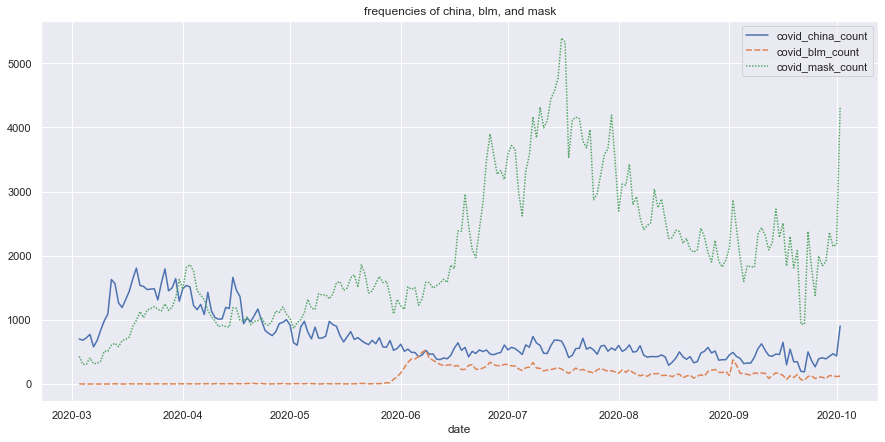

In [25]:
_, ax11 = plt.subplots(figsize=(15, 7))

cbm = sns.lineplot(data=covid_df[['covid_china_count', 'covid_blm_count', 'covid_mask_count']], ax=ax11)
cbm_title = cbm.set_title('frequencies of china, blm, and mask')

From the plot above, we can see that there is a surge of discussions on the topic of "mask" and "blm" starting early June, while the discussion trend for "China" is constantly decreasing. 

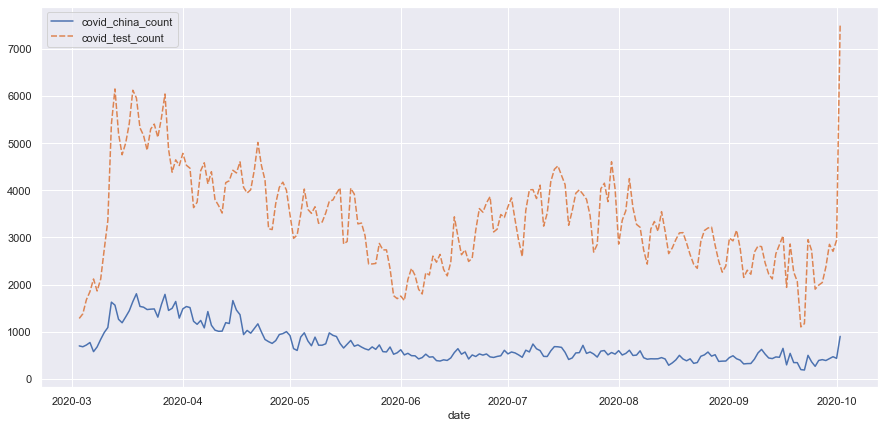

In [26]:
_, ax12 = plt.subplots(figsize=(15, 7))

ct = sns.lineplot(data=covid_df[['covid_china_count', 'covid_test_count']], ax=ax12)
ct_title = cbm.set_title('frequencies of china and test')

Also, the discussion trend for "China" and "test" are both decreasing, resulting in a positive correlation of around **0.75**. However, this correlation is more likely to be a **coincidence**, as people are very unlikely to talk about these two topics at the same time. **Therefore, this positive relationship implies more of a correlation rather than a causation.**

This is several examples of the case where multiple keywords have no real semantic association with each other but do manifest some kind of correlation pattern. 

---

### Evaluation of significance

In order to evaluate the significance of our result (the model that uses "biden" and "election" to predict "trump"), we decide to use train-test-split to evaluate the solidity of our model. 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(covid_df[['covid_biden_count', 'covid_election_count']], covid_df['covid_trump_count'], test_size=0.3, random_state=15)
model = LinearRegression().fit(x_train, y_train)

prediction = model.predict(x_test)

It's hard to define what a good prediction is. Should the margin of error be 100? Or should it be 200?

In [29]:
prediction_array = np.zeros(len(prediction))

for i in range(len(prediction)):
    prediction_array[i] = abs(prediction[i] - y_test[i]) < 200
    
print('Prediction accuracy for test array given a margin of error of 200: {:.2f}'.format(sum(prediction_array) / len(prediction)))

Prediction accuracy for test array given a margin of error of 200: 0.54


In [30]:
# sum((x_test.index > '2020-05-01') & (x_test.index < '2020-07-31')) / len(x_test)
train_array = np.zeros(len(x_train))

predict_train = model.predict(x_train)
for i in range(len(predict_train)):
    train_array[i] = abs(predict_train[i] - y_train[i]) < 200
    
print('Prediction accuracy for train array given a margin of error of 200: {:.2f}'.format(sum(train_array) / len(y_train)))

Prediction accuracy for train array given a margin of error of 200: 0.58


It is worthy to note that the prediction accuracy for the training set and the testing set is similar, even though the training set has a slight advantage. Even though the result 0.54 and 0.58 may not seem as good it may seem (we get a $r^2$ score of 0.87 earlier), 200 is actually a pretty tight bound given how many comments we have on these topic each day (more than 1200 per day). In this regard, this model is in fact very solid for producing an accurate result for the keyword "trump". 

### _Preregistration Analysis II_

In the following step, we prepare our predictors and outcomes for the four linear regression models. The predictor for model 1 and 2 is `death_increase_num`, and that for model 3 and 4 is `death_increase_ratio`. The outcome for model 1 and 3 is `keyword_freq`, and that for model 2 and 4 is `relative_freq`. 

In [32]:
death_increase_num = data[ ["death_increase"] ] 
data["death_increase_ratio"] = data["death_increase"] / data["positive_increase"]
death_increase_ratio = data[ ["death_increase_ratio"] ]
keyword_freq = data["covid_death_count"]
relative_freq = data["covid_death_count"] / data["covid_count"]

Then we are ready for building our models.

In [33]:
model1 = LinearRegression().fit(death_increase_num, keyword_freq)
model2 = LinearRegression().fit(death_increase_num, relative_freq)
model3 = LinearRegression().fit(death_increase_ratio, keyword_freq)
model4 = LinearRegression().fit(death_increase_ratio, relative_freq)
r_values = [model1.score(death_increase_num, keyword_freq), model2.score(death_increase_num, relative_freq), model3.score(death_increase_ratio, keyword_freq), model4.score(death_increase_ratio, relative_freq)]
for i in range(4):
    print("Model {}:".format(i+1))
    print("R-squared value: {:.4f}".format(r_values[i]))

Model 1:
R-squared value: 0.3542
Model 2:
R-squared value: 0.2030
Model 3:
R-squared value: 0.2045
Model 4:
R-squared value: 0.3881


In [34]:
model_first_100 = LinearRegression().fit(death_increase_num[:100], keyword_freq[:100])
print(model_first_100.score(death_increase_num[:100], keyword_freq[:100]))

0.5664264665524241


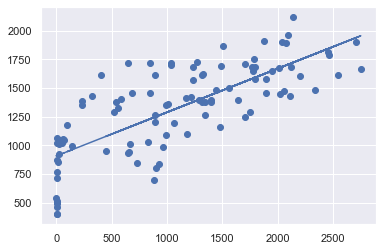

In [35]:
plt.plot(death_increase_num[:100], model_first_100.predict(death_increase_num[:100]), label="regression line")
plt.scatter(death_increase_num[:100], keyword_freq[:100], label="data points")

In [36]:
model_second_100 = LinearRegression().fit(death_increase_num[50:150], keyword_freq[50:150])
print(model_second_100.score(death_increase_num[50:150], keyword_freq[50:150]))

0.36967950418761875


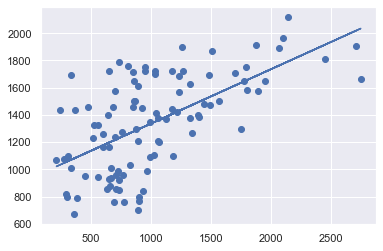

In [37]:
plt.plot(death_increase_num[50:150], model_second_100.predict(death_increase_num[50:150]), label="regression line")
plt.scatter(death_increase_num[50:150], keyword_freq[50:150], label="data points")

In [38]:
model_third_100 = LinearRegression().fit(death_increase_num[100:200], keyword_freq[100:200])
print(model_third_100.score(death_increase_num[100:200], keyword_freq[100:200]))

0.0429101419004847


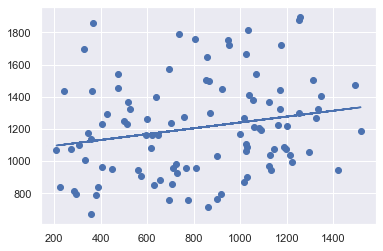

In [39]:
plt.plot(death_increase_num[100:200], model_third_100.predict(death_increase_num[100:200]), label="regression line")
plt.scatter(death_increase_num[100:200], keyword_freq[100:200], label="data points")

Also, we want to plot our four models to observe our models visually. 

---
#### Model 1:

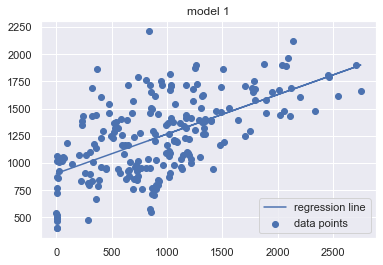

In [40]:
plt.plot(death_increase_num, model1.predict(death_increase_num), label="regression line")
plt.scatter(death_increase_num, keyword_freq, label="data points")
plt.title("model 1")
plt.legend()
plt.show()

#### Model 2:

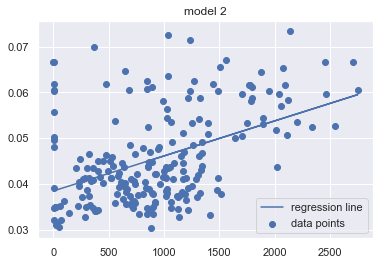

In [41]:
plt.plot(death_increase_num, model2.predict(death_increase_num), label="regression line")
plt.scatter(death_increase_num, relative_freq, label="data points")
plt.title("model 2")
plt.legend()
plt.show()

#### Model 3:

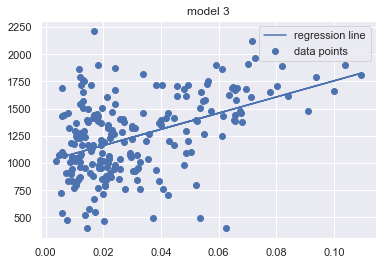

In [42]:
plt.plot(death_increase_ratio, model3.predict(death_increase_ratio), label="regression line")
plt.scatter(death_increase_ratio, keyword_freq, label="data points")
plt.title("model 3")
plt.legend()
plt.show()

#### Model 4:

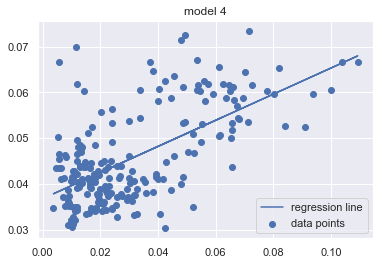

In [43]:
plt.plot(death_increase_ratio, model4.predict(death_increase_ratio), label="regression line")
plt.scatter(death_increase_ratio, relative_freq, label="data points")
plt.title("model 4")
plt.legend()
plt.show()

Comparing $r^2$ values and graphs of these four models, we find these models produce contradictory results. Using `death_increase_num` as the predictor, taking `keyword_freq` as the outcome better captures the linear relationship. However, setting `death_increase_ratio` as the predictor, a linear model works better with `relative_freq` being the outcome. Similarly, comparing model 1 and 3, model 2 and 4, we find that `death_increase_num` works better with `keyword_freq`, and `death_increase_num` works better with `relative_freq`. 
Therefore, instead of simply stating that which variable is a better predictor or indicator, x and y values should be considered simultaneously when building a linear regression model. 

### Evaluation of significance

In our second analysis, we build four linear regression models. However, even the larger two of them only have $r^2$ values less than 0.4. To investigate whether there exists a linear relationship between death cases and frequencies of “covid+death" on Reddit, or our models merely come from simple randomness, we use randomization to evaluate our linear models.

We want to evaluate our model 1 and 4, whose $r^2$ values are relatively large compared to that of model 2 and 3. 

For Model 1, we randomzie the order of `keyword_freq`. 

In [44]:
new_keyword_freq = keyword_freq.copy()
np.random.shuffle(new_keyword_freq)
model5 = LinearRegression().fit(death_increase_num, new_keyword_freq)
print("R-squared value of the randomized Model 1: {:.4f}".format(model5.score(death_increase_num, new_keyword_freq)))

R-squared value of the randomized Model 1: 0.0000


For Model 2, we randomize the order of `relative_freq`.

In [45]:
new_relative_freq = relative_freq.copy()
np.random.shuffle(new_relative_freq)
model6 = LinearRegression().fit(death_increase_ratio, new_relative_freq)
print("R-squared value of the randomized Model 4: {:.4f}".format(model6.score(death_increase_ratio, new_relative_freq)))

R-squared value of the randomized Model 4: 0.0031


By randomization, we see that simple randomness usually produce much lower $r^2$ values.

---

Next, to see how well our model predicts such a linear relationship, we use train/test splits to evaluate our models. 

In [46]:
len(data)

214

In [47]:
train_index = []
test_index = []
for i in range(len(data)):
    if i % 2 == 0:
        train_index.append(i)
    else:
        test_index.append(i)
train = data.iloc[train_index]
test = data.iloc[test_index]

With the training and test sets, we test our models.

In [48]:
model = LinearRegression().fit(train[ ["death_increase"] ], train["covid_death_count"])
score1 = model.score(train[ ["death_increase"] ], train["covid_death_count"])
print("R-squared value of the training set: {:.4f}".format(score1))

R-squared value of the training set: 0.3852


Then we use this trained model to predict `covid_death_count` in our test set, and see how well our prediction fits the actual variable.

In [49]:
score2 = model.score(test[ ["death_increase"] ], test["covid_death_count"])
print("R-squared value of the test set: {:.4f}".format(score2))

R-squared value of the test set: 0.3204


Comparing these above $r^2$ values, we see that the linear model built on the training set also predicts the behavior of the test set relatively well.

---

Now, we exchange our training and test sets to have more confidence. 

In [50]:
train = data.iloc[test_index]
test = data.iloc[train_index]
model = LinearRegression().fit(train[ ["death_increase"] ], train["covid_death_count"])
score1 = model.score(train[ ["death_increase"] ], train["covid_death_count"])
print("R-squared value of the training set: {:.4f}".format(score1))
score2 = model.score(test[ ["death_increase"] ], test["covid_death_count"])
print("R-squared value of the test set: {:.4f}".format(score2))

R-squared value of the training set: 0.3274
R-squared value of the test set: 0.3783


Splitting the dataset into two smaller sets, we again show that the linear regression model holds between `death_increase` and `covid_death_count`. 

## Interpretation and Conclusions

### Hypothesis 1

In the first analysis, we hypothesized that we can best predict the trend for "trump" using the trend of "biden" and "election". The model with "biden" and "election" as the input and "trump" as the output turned out to perform incredibly well, with an $r^2$ score of $0.87$. Then, we compared this model to another model that uses some random keyword as the input ("mask", "job", "test", and "economy"), which has only achieved an $r^2$ score of $0.24$. This further validates our hypothesis that the biden-election model is indeed the best one in performing this task. 

We have also constructed two single variable models to predict the trend of trump, using either "biden" or "election" as the input. The "Biden" model achieved a score of $0.85$, while the "election" model has a score of $0.74$. We postulated that when people talked about "Biden" and "Trump", they are more likely to pass down "election" as an implicit notion and would not formally address it in the discussion. As a result, the "Biden" model has achieved a higher score. 

After performing that analysis, we shifted our focus to observe how the discussion trends for a group of keywords (12 of them in total) are interconnected by constructing a correlation matrix. The correlation matrix yields some very interesting results, such as the strong positive relationship between "job" and "money" (correlation of 0.96), a negative correlation between "China" and "mask" (correlation of -0.44), and a strong positive correlation between "China" and "test" (correlation of 0.76). We argued that the connection between "job" and "money" is more likely to be a causation given how "job" and "money" are closely related in our real life, while the connection between "China" and a set of keywords is more likely to be mere coincidence after plotting the trend for each of the keywords. The discussion trend for "China" has been on the decrease since March, which makes it susceptible to a false positive correlation with keywords that have a decreasing discussion trend, and also a false negative correlation with keywords that have a upward trend ("blm" and "mask"). 

---

To wrap it up, we have validated our hypothesis that the multivariable model using "biden" and "election" as the predictor can best predict "Trump" as the outcome. We have also discovered other inherent correlations between multiple keywords that open up many possibilities for future analyses, even though some of them might occur merely due to coincidence. It's a tragedy that the aggregate function for reddit has been turned down temporarily, and we expect to have more interesting results once the October and November data comes in. 

### Hypothesis 2

In our second analysis, we have results showing our previous hypotheses are wrong. However, we note that the $r^2$ value of Model 4 is the highest, and there are several possible explanations:
1. When we use `death_increase_ratio` (daily death cases divided by daily positive cases) and `relative_freq` (daily frequency of "covid+death" divided by daily frequency of "covid" to replace `death_increase_num` and `keyword_freq`, we want to eliminate the influence of the overall spreading of coronavirus. Therefore, we need to use the "arbitrary" or "relative" data simultaneously. That explains why Model 2 and 3 have $r^2$ values lower than that of Model 1 and 4.
2. Model 4 has a higher $r^2$ value compared to that of Model 1, which partly validates our hypotheses. To better capture the relationship in our data, we consider `covid_count` (daily frequency of all comments including "covid") and `positive_increase` (daily positive cases) as less relevant factors and need to minimize their presence if we want to have a clearer image of the relationship between discussion about death and death cases of covid-19.

---

Overall, after performing analysis and evaluating the significance of our result, we realize there is a linearly relationship between death cases in the US and discussion about death of covid-19 on Reddit. However, the $r^2$ values of our models are lower than expected. There must exist many other factors influencing people's discussion about "covid+death", rather than the situation that Reddit comments react merely to the trend of death cases in the US.

## Limitations

1. Our initial interest is to observe how Reddit users react to and talk about the spreading of covid-19. We used pushshift.io API due to its productiveness; however, frequencies of keywords on Reddit is not necessarily the most accurate way to evaluate a topic's popularity. For example, one user could reply to every comment in a post such that he contributes a lot to our dataset, while indeed the popularity of that topic does not increase as much as our dataset measures. 

2. There are two different endpoints for the reddit API: the comment endpoint, and the submission endpoint. We decided to concentrate on the comment endpoint since this is where most of the discussions occur, even though the two endpoints may yield slightly different results. 

3. When searching for multiple keywords, we limited our search to “covid” and another keyword. We used “covid” instead of the more formal expression of “coronavirus” because we assumed that people would use “covid” more frequently than “coronavirus”. “Coronavirus” is more likely to appear in news releases than in the discussion section.

4. Also, we set the filtering condition as including both "covid" and certain keyword in a comment. It is highly possible that this method of data collection excludes comments talking about covid while not including "covid" under the default context. 

5. There may be multiple ways people use to phrase a term. For example, when talking about “covid testing”, people may phrase it as “get tested for covid”, or “the number of covid tests per day.” We are trying to think of as many terms as possible for a keyword that might be phrased differently. But we are not native speakers, and hence we may fail to predict Americans' expression methods. 


## Source Code

All of our source code and commit history can be found at https://github.com/kaiyue95/INFO-2950-Final-Project. 

## Acknowledgements

We would like to thank for the help of many for helping us accomplish this report. Specifically, we want to thank the library [seaborn](https://seaborn.pydata.org/api.html) for providing such a powerful API in creating asthetically pleasing visualizations. We would also like to thank for the [stackoverflow](https://stackoverflow.com/questions/58432235/changing-color-of-seaborn-plot-line) platform as well as the many quality posts there that have helped us countless times when we ran into some kind of technical issues. And lastly, we want to thank for the course stuff who have provided us with constructive feedback both on campuswire form and individually on our assignment. We would not be able to complete this project without all these general help. 

## Appendix: Data Cleaning Description

The Appendix is placed in a separate file. 

## Questions for reviewers

1. Is our interpretation for our analysis too technical? Should we revise it in Phase V to apply our analysis to real-world knowledge?
2. If so, in what ways should we apply our analysis more to real-world knowledge?
3. What are some other methods that we can use for the evaluation of significance? We have only used train-test-split and feel like that randomization and bootstrap wouldn't really help there. 
4. Should we leave it the data description section as-is (question-answer format), or make it into several coherent paragraphs?